<a href="https://colab.research.google.com/github/dsreliete/Womakerscode_DA_colab_desafio_individual/blob/main/Estat%C3%ADstica_Teste_de_Hip%C3%B3teses_JuniaBSousa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Considerando a base de dados experimento_test_ab.csv responda as questões abaixo:

In [ ]:
# Importando pacotes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import shapiro

In [ ]:
# Carregando Dataframe
df_experimento_test= pd.read_csv('experimento_teste_ab.csv')

In [ ]:
df_experimento_test.head()

,Visitante_ID,Versão_Página,Visualizações,Conversões
0,1,A,167,1
1,2,A,160,0
2,3,A,170,0
3,4,A,161,1
4,5,A,104,0


In [ ]:
df_experimento_test.tail()

,Visitante_ID,Versão_Página,Visualizações,Conversões
1995,1996,B,120,0
1996,1997,B,182,0
1997,1998,B,197,0
1998,1999,B,122,0
1999,2000,B,164,0


In [ ]:
df_experimento_test.shape

(2000, 4)

In [ ]:
df_experimento_test.describe()

,Visitante_ID,Visualizações,Conversões
count,2000.000000,2000.000000,2000.000000
mean,1000.500000,150.755500,0.115000
std,577.494589,28.809421,0.319102
min,1.000000,100.000000,0.000000
25%,500.750000,126.000000,0.000000
50%,1000.500000,151.000000,0.000000
75%,1500.250000,175.000000,0.000000
max,2000.000000,199.000000,1.000000


In [ ]:
df_experimento_test.columns

Index(['Visitante_ID', 'Versão_Página', 'Visualizações', 'Conversões'], dtype='object')

## 1.	Qual dos cenários tem a maior taxa de conversão?

In [ ]:
# Calcular a taxa de conversão
df_experimento_test['Taxa_Conversao'] = (df_experimento_test['Conversões'] / df_experimento_test['Visualizações']) * 100

# Agrupar por versão de página e calcular a média da taxa de conversão
resultado = df_experimento_test.groupby('Versão_Página')['Taxa_Conversao'].mean().reset_index()

# Encontrar o cenário com a maior taxa de conversão
cenario_maximo = resultado.loc[resultado['Taxa_Conversao'].idxmax()]

print(f"O cenário com a maior taxa de conversão é {cenario_maximo['Versão_Página']}, e a Taxa de Conversão é de {cenario_maximo['Taxa_Conversao']:.2f}%")


O cenário com a maior taxa de conversão é B, e a Taxa de Conversão é de 0.08%


2.	Calcule qual o tamanho da amostra necessária para o desenvolvimento de um teste A/B, seguindo os seguintes critérios:
a.	O cenário A, da base, como o inicial, que funciona hoje.
b.	Considere 95% de confiança de que o efeito na conversão não foi aleatório com um nível de significância de 5% (alpha = 0,05).
c.	Também considere 80% de certeza conseguir capturar o efeito da nova abordagem.
d.	O aumento para 10% de conversão.


In [ ]:
# Dados
p1 = 0.10  # Taxa de conversão do cenário A
p2 = 0.20  # Taxa de conversão esperada do cenário B
alpha = 0.05  # Nível de significância
power = 0.80  # Poder do teste

# Cálculo dos valores Z
Z_alpha = stats.norm.ppf(1 - alpha / 2)  # Z para 95% de confiança
Z_beta = stats.norm.ppf(power)  # Z para 80% de poder

# Cálculo do tamanho da amostra
n = ((Z_alpha + Z_beta) ** 2 * (p1 * (1 - p1) + p2 * (1 - p2))) / (p2 - p1) ** 2

# Tamanho da amostra por grupo
n_por_grupo = np.ceil(n)

print(f"O Tamanho da amostra necessário por grupo é de {int(n_por_grupo)}")


O Tamanho da amostra necessário por grupo é de 197


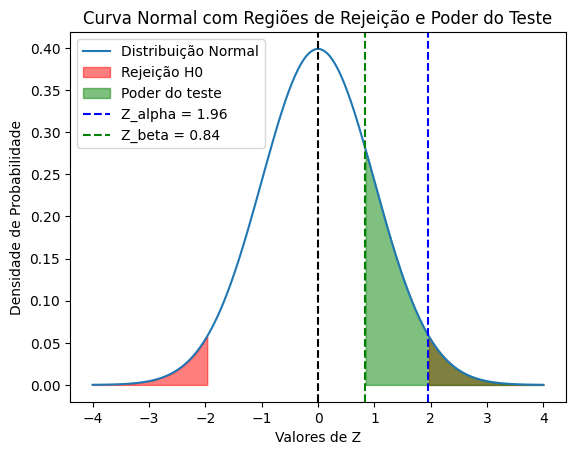

In [ ]:
# Plotando a curva normal e as áreas de rejeição e poder
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

plt.plot(x, y, label="Distribuição Normal")

# Destacando a região de rejeição (área além de Z_alpha)
plt.fill_between(x, y, where=(x > Z_alpha), color='red', alpha=0.5, label="Rejeição H0")
plt.fill_between(x, y, where=(x < -Z_alpha), color='red', alpha=0.5)

# Destacando a região do poder do teste (área além de Z_beta)
plt.fill_between(x, y, where=(x > Z_beta), color='green', alpha=0.5, label="Poder do teste")

# Linha central
plt.axvline(0, color='black', linestyle='--')

# Linhas de Z_alpha e Z_beta
plt.axvline(Z_alpha, color='blue', linestyle='--', label=f'Z_alpha = {Z_alpha:.2f}')
plt.axvline(Z_beta, color='green', linestyle='--', label=f'Z_beta = {Z_beta:.2f}')

plt.title("Curva Normal com Regiões de Rejeição e Poder do Teste")
plt.xlabel("Valores de Z")
plt.ylabel("Densidade de Probabilidade")
plt.legend()

plt.show()


## Verifique a base pacientes.csv, os dados são fictícios. A sintetiza uma base de dados de um hospital que trata de pacientes com problemas cardíacos. Considere a base como a população, portanto as estatísticas da população são conhecidas. Responda as perguntas abaixo:

In [ ]:
# Carregando Dataframe
df_pacientes= pd.read_csv('pacientes.csv')

In [ ]:
df_pacientes.head()

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


In [ ]:
df_pacientes.tail()

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
995,995,136.381404,58,1,0,1,Feminino,Caucasiano,Com condições de saúde adicionais
996,996,161.801012,41,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
997,997,134.390624,70,0,0,0,Masculino,Caucasiano,Saudável
998,998,160.818609,33,1,0,0,Feminino,Caucasiano,Saudável
999,999,159.877549,49,0,1,0,Masculino,Afro-americano,Saudável


In [ ]:
df_pacientes.shape

(1000, 9)

In [ ]:
df_pacientes.describe()

,Unnamed: 0,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,150.375623,49.757000,0.503000,1.526000,0.51000
std,288.819436,9.943613,11.682998,0.500241,1.104783,0.50015
min,0.000000,112.929821,30.000000,0.000000,0.000000,0.00000
25%,249.750000,144.240948,40.000000,0.000000,1.000000,0.00000
50%,499.500000,150.455624,49.000000,1.000000,2.000000,1.00000
75%,749.250000,156.792113,60.000000,1.000000,3.000000,1.00000
max,999.000000,181.803131,70.000000,1.000000,3.000000,1.00000


In [ ]:
df_pacientes.columns

Index(['Unnamed: 0', 'Pressao_Arterial', 'Idade', 'Genero', 'Etnia',
       'Estado_Saude', 'Nome_Genero', 'Nome_Etnia', 'Nome_Estado_Saude'],
      dtype='object')

3.	Considerando uma amostra de 45 números que representam o index do dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697,  89, 280, 232, 756, 358,  36, 439, 768, 967, 699, 473, 222,  89, 639, 883, 558, 757,  84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]). Considerando essa amostra é possível dizer que a idade média das pessoas com problemas cardíacos é maior que 50 anos? Nível de significância igual a 5%.

In [ ]:
# Definir os índices da amostra
indices = [909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715,
           677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768,
           967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895,
           217, 224, 311, 348, 146, 505, 273, 957, 362]

In [ ]:
# Filtrar o DataFrame pelos índices fornecidos
amostra = df_pacientes.loc[indices]

# Contar quantas pessoas têm Estado_Saude igual a 1
contagem_1 = (amostra['Estado_Saude'] == 1).sum()
print(f"Número de pessoas com Estado_Saude igual a 1: {contagem_1}")

# Contar quantas pessoas têm Estado_Saude igual a 0
contagem_0 = (amostra['Estado_Saude'] == 0).sum()
print(f"Número de pessoas com Estado_Saude igual a 0: {contagem_0}")

# Contar total de pessoas com Estado_Saude igual a 1 ou 0
contagem_total = amostra['Estado_Saude'].isin([0, 1]).sum()
print(f"Número total de pessoas com Estado_Saude igual a 1 ou 0: {contagem_total}")

Número de pessoas com Estado_Saude igual a 1: 19
Número de pessoas com Estado_Saude igual a 0: 26
Número total de pessoas com Estado_Saude igual a 1 ou 0: 45


In [ ]:
# Filtrar apenas as pessoas com problemas cardíacos
amostra_cardíaca = amostra[amostra['Estado_Saude'] == 1]

# Calcular a idade média
idade_media = amostra_cardíaca['Idade'].mean()

# Realizar o teste t
t_stat, p_value = stats.ttest_1samp(amostra_cardíaca['Idade'], 50)

# Valor p unilateral
p_value_unilateral = p_value / 2

# Resultados
print(f"Idade média: {idade_media:.2f} anos")
print(f"Valor T: {t_stat:.2f}")
print(f"Valor p (unilateral): {p_value_unilateral:.4f}")

# Decisão sobre a hipótese nula
alpha = 0.05
if p_value_unilateral < alpha:
    print("Rejeitamos a hipótese nula: A idade média das pessoas com problemas cardíacos é maior que 50 anos.")
else:
    print("Não rejeitamos a hipótese nula: Não podemos afirmar que a idade média das pessoas com problemas cardíacos é maior que 50 anos.")


Idade média: 48.16 anos
Valor T: -0.67
Valor p (unilateral): 0.2568
Não rejeitamos a hipótese nula: Não podemos afirmar que a idade média das pessoas com problemas cardíacos é maior que 50 anos.


4.	Queremos entender que tipo de amostra estamos lidando se dividirmos os conjuntos em 2, sendo um com pessoas que têm condições de saúde adicionais e o outro com pessoas saudáveis. Seria dependente ou independente?

In [ ]:
# Verificar a contagem de indivíduos em cada grupo
contagem_estados = df_pacientes['Nome_Estado_Saude'].value_counts()
print("\nContagem de pessoas em cada grupo:")
print(contagem_estados)

# Verificar se existem valores duplicados na coluna 'Unnamed: 0' (ou outra coluna que identifique indivíduos)
duplicados = df_pacientes['Unnamed: 0'].duplicated().any()


Contagem de pessoas em cada grupo:
Nome_Estado_Saude
Com condições de saúde adicionais    510
Saudável                             490
Name: count, dtype: int64


In [ ]:
# Exibir a estrutura do DataFrame para verificar se os grupos estão separados
print("\nEstrutura do DataFrame:")
print(df_pacientes.info())


Estrutura do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   Pressao_Arterial   1000 non-null   float64
 2   Idade              1000 non-null   int64  
 3   Genero             1000 non-null   int64  
 4   Etnia              1000 non-null   int64  
 5   Estado_Saude       1000 non-null   int64  
 6   Nome_Genero        1000 non-null   object 
 7   Nome_Etnia         1000 non-null   object 
 8   Nome_Estado_Saude  1000 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 70.4+ KB
None


In [ ]:
# Conclusão sobre a dependência ou independência das amostras
if not duplicados and len(contagem_estados) == 2:
    print("\nConclusão: Os grupos de pessoas com condições de saúde adicionais e saudáveis são amostras independentes.")
else:
    print("\nConclusão: Os grupos podem ser amostras dependentes ou não estão claramente separados.")


Conclusão: Os grupos de pessoas com condições de saúde adicionais e saudáveis são amostras independentes.


5.	Agora considere o um conjunto de pessoas aleatória que representam o index do dataframe,  índices = ([690, 894,  67, 201, 364,  19,  60, 319, 588, 643, 855, 623, 530, 174, 105, 693,   6, 462, 973, 607, 811, 346, 354, 966, 943, 372]), podemos dizer que a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde? Considere o nível de significância a 6%.

In [ ]:
# Definindo os índices da amostra
indices = [690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372]

# Filtrando os dados pela amostra
amostra = df_pacientes.loc[indices]

# Separando os grupos
grupo_com_condicoes = amostra[amostra['Nome_Estado_Saude'] == 'Com condições de saúde adicionais']['Pressao_Arterial']
grupo_saudavel = amostra[amostra['Nome_Estado_Saude'] == 'Saudável']['Pressao_Arterial']

In [ ]:
# Realizando o teste t para amostras independentes
t_stat, p_value = stats.ttest_ind(grupo_com_condicoes, grupo_saudavel)

# Exibindo os resultados
print(f"Valor T: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")

# Nível de significância
alpha = 0.06

# Interpretação do resultado
if p_value < alpha:
    print("Rejeitamos a hipótese nula: As pressões arteriais médias são diferentes.")
else:
    print("Não rejeitamos a hipótese nula: Não há evidências suficientes para afirmar que as pressões arteriais médias são diferentes.")

Valor T: 0.08
Valor p: 0.9359
Não rejeitamos a hipótese nula: Não há evidências suficientes para afirmar que as pressões arteriais médias são diferentes.


6.	Existe uma diferença significativa na pressão arterial média entre diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%)
a.	Hipótese Nula (H0): A pressão arterial média é a mesma em todos os grupos étnicos.
b.	Existe uma associação entre a idade dos pacientes e sua pressão arterial?
i.	Hipótese Nula (H0): A idade dos pacientes é independente da pressão arterial.
ii.	Hipótese Alternativa (H1): A idade dos pacientes está associada à sua pressão arterial.
c.	pótese Alternativa (H1): Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.


In [ ]:
# Realizando o teste ANOVA
anova_result = stats.f_oneway(
    *[group['Pressao_Arterial'].values for name, group in df_pacientes.groupby('Etnia')]
)

# Exibindo os resultados do ANOVA
print(f"Teste ANOVA:")
print(f"Valor F: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.4f}")

# Nível de significância
alpha = 0.05

# Interpretação do resultado do ANOVA
if anova_result.pvalue < alpha:
    print("Conclusão ANOVA: Rejeitamos a hipótese nula. Há uma diferença significativa na pressão arterial média entre os grupos étnicos.")
else:
    print("Conclusão ANOVA: Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que a pressão arterial média é a mesma em todos os grupos étnicos.")


Teste ANOVA:
Valor F: 0.23
Valor p: 0.8738
Conclusão ANOVA: Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que a pressão arterial média é a mesma em todos os grupos étnicos.


In [ ]:
# Calculando a correlação entre idade e pressão arterial
correlacao, p_value_correlation = stats.pearsonr(df_pacientes['Idade'], df_pacientes['Pressao_Arterial'])

# Exibindo os resultados da correlação
print(f"\nCorrelação entre Idade e Pressão Arterial:")
print(f"Coeficiente de correlação: {correlacao:.2f}")
print(f"Valor p para a correlação: {p_value_correlation:.4f}")

# Nível de significância
alpha_correlation = 0.05

# Interpretação do resultado da correlação
if p_value_correlation < alpha_correlation:
    print("Conclusão Correlação: Rejeitamos a hipótese nula. A idade dos pacientes está associada à pressão arterial.")
else:
    print("Conclusão Correlação: Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que a idade dos pacientes está associada à pressão arterial.")



Correlação entre Idade e Pressão Arterial:
Coeficiente de correlação: -0.02
Valor p para a correlação: 0.4994
Conclusão Correlação: Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que a idade dos pacientes está associada à pressão arterial.


7.	Lúcia é uma pesquisadora e tem o objetivo de entender a relação de gênero neste grupo de pacientes. Acredita-se que há uma relação entre o sexo e condições de saúde adicionais. (Teste qui-quadrado)

In [ ]:
# Criando a tabela de contingência
tabela_contingencia = pd.crosstab(df_pacientes['Nome_Genero'], df_pacientes['Nome_Estado_Saude'])

# Exibindo a tabela de contingência
print("Tabela de Contingência:")
print(tabela_contingencia)

Tabela de Contingência:
Nome_Estado_Saude  Com condições de saúde adicionais  Saudável
Nome_Genero                                                   
Feminino                                         257       246
Masculino                                        253       244


In [ ]:
# Criando a tabela de contingência
tabela_contingencia = pd.crosstab(df_pacientes['Nome_Genero'], df_pacientes['Nome_Estado_Saude'])

# Exibindo a tabela de contingência
print("Tabela de Contingência:")
print(tabela_contingencia)


Tabela de Contingência:
Nome_Estado_Saude  Com condições de saúde adicionais  Saudável
Nome_Genero                                                   
Feminino                                         257       246
Masculino                                        253       244


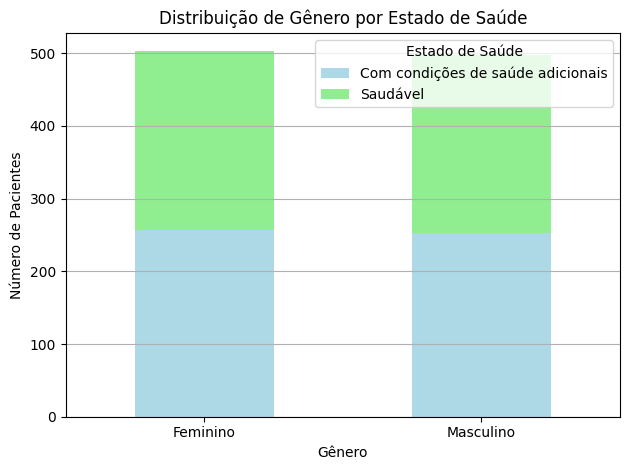

In [ ]:
# Plotando a tabela de contingência como um gráfico de barras empilhadas
tabela_contingencia.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.title('Distribuição de Gênero por Estado de Saúde')
plt.xlabel('Gênero')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=0)
plt.legend(title='Estado de Saúde')
plt.grid(axis='y')
plt.tight_layout()

# Exibindo o gráfico
plt.show()

8.	Qual é o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais? (nível de confiança 95%)

In [ ]:
# Filtrando os pacientes com condições de saúde adicionais
pacientes_com_condicoes = df_pacientes[df_pacientes['Nome_Estado_Saude'] == 'Com condições de saúde adicionais']

# Calculando a média e o desvio padrão da pressão arterial
media_pressao = pacientes_com_condicoes['Pressao_Arterial'].mean()
desvio_padrao = pacientes_com_condicoes['Pressao_Arterial'].std()
n = pacientes_com_condicoes['Pressao_Arterial'].count()  # Número de pacientes

# Calculando o erro padrão da média
erro_padrao = desvio_padrao / np.sqrt(n)

# Encontrando o valor crítico t para um intervalo de confiança de 95%
t_critico = stats.t.ppf(0.975, df=n-1)  # 0.975 porque é um intervalo de 95%

# Calculando o intervalo de confiança
margem_erro = t_critico * erro_padrao
intervalo_conf = (media_pressao - margem_erro, media_pressao + margem_erro)

# Exibindo os resultados
print(f"Média da Pressão Arterial: {media_pressao:.2f}")
print(f"Desvio Padrão: {desvio_padrao:.2f}")
print(f"Intervalo de Confiança (95%): {intervalo_conf[0]:.2f} a {intervalo_conf[1]:.2f}")


Média da Pressão Arterial: 150.12
Desvio Padrão: 10.33
Intervalo de Confiança (95%): 149.22 a 151.02


9.	A distribuição da pressão arterial na população segue uma distribuição normal?
a.	Hipótese Nula (H0): A distribuição da pressão arterial na população segue uma distribuição normal.
b.	Hipótese Alternativa (H1): A distribuição da pressão arterial na população não segue uma distribuição normal.


In [ ]:
# Extraindo a coluna de pressão arterial
pressao_arterial = df_pacientes['Pressao_Arterial'].dropna()  # Remove dados faltantes

# Realizando o teste de Shapiro-Wilk
statistic, p_value = shapiro(pressao_arterial)

# Exibindo os resultados
print(f"Estatística do teste: {statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

# Nível de significância
alpha = 0.05

# Interpretação do resultado do teste
if p_value < alpha:
    print("Conclusão: Rejeitamos a hipótese nula. A distribuição da pressão arterial não segue uma distribuição normal.")
else:
    print("Conclusão: Não rejeitamos a hipótese nula. A distribuição da pressão arterial segue uma distribuição normal.")

Estatística do teste: 0.9970
Valor p: 0.0607
Conclusão: Não rejeitamos a hipótese nula. A distribuição da pressão arterial segue uma distribuição normal.


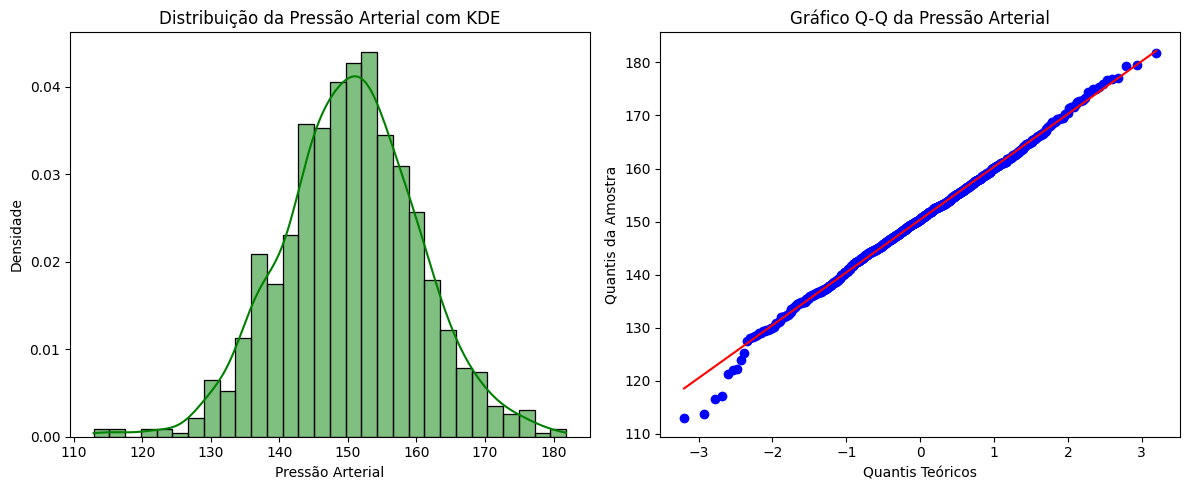

In [ ]:
# Gráfico 1: Histograma com KDE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1º gráfico
sns.histplot(pressao_arterial, kde=True, stat="density", color='green', bins=30)
plt.title('Distribuição da Pressão Arterial com KDE')
plt.xlabel('Pressão Arterial')
plt.ylabel('Densidade')

# Gráfico 2: Gráfico Q-Q
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2º gráfico
stats.probplot(pressao_arterial, dist="norm", plot=plt)
plt.title('Gráfico Q-Q da Pressão Arterial')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis da Amostra')

# Exibir gráficos
plt.tight_layout()
plt.show()